In [3]:
### these should go easy
import sys
import pandas as pd
import numpy as np
import os
import string
import collections
import regex as re

### this requires installation
import nltk
from nltk.collocations import *

### installation via pip: CFLAGS='-stdlib=libc++'  pip install ufal.morphodita
### quite complicated, as you need compilation of C++
from ufal.morphodita import *

czech_tagger='czech-morfflex-pdt-161115.tagger'
tagger = Tagger.load(czech_tagger)
forms = Forms()
lemmas = TaggedLemmas()
tokens = TokenRanges()
tokenizer = tagger.newTokenizer()

### for scrapping of web data
from urllib.request import urlopen
from bs4 import BeautifulSoup

### for network analysis
import networkx as nx

### our own package for generating and visualizing networks
import network_functions as nf

### for visualization
import plotly.plotly as py
import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
init_notebook_mode(connected=True)

In [4]:
projevy_df = pd.read_pickle("projevy_df.pickle")

In [5]:
### remove hacha overlapping with Benes - for diachronical analysis
for hacha in ["1940-Hacha", "1941-Hacha", "1942-Hacha", "1943-Hacha", "1944-Hacha"]:
    projevy_df = projevy_df[projevy_df["rok_prezident"] != hacha]

In [6]:
def lemmatization_and_postagging(text):
    '''from a string, form a dataframe with columns for:
    (1) word in its original form
    (2) lemmatized word
    (3) part of speech tag
    '''
    string_variable = text.lower()
    for c in string.punctuation:
        string_variable = string_variable.replace(c,"")
    string_variable = string_variable.split()
    tokenizer.setText(" ".join(string_variable))
    t = 0
    output = []

    while tokenizer.nextSentence(forms, tokens):
          tagger.tag(forms,lemmas)        
    
          for i in range (len(lemmas)):
            form = forms[i]
            output.append([form, lemmas[i].lemma.partition("_")[0].replace("-1","").replace("-2","").replace("-3",""), lemmas[i].tag])
    output_df = pd.DataFrame(output, columns=("form", "lemma", "TAG"))
    return output_df

def lemmatatization_and_filtering(text):
    lemmata_table = lemmatization_and_postagging(text)
    return lemmata_table[lemmata_table["TAG"].str.startswith(("N","A"))]["lemma"].tolist()


In [7]:
### apply lemmatization, postagging and filtering
projevy_df["lemmata_filtered"] = projevy_df.apply(lambda row: lemmatatization_and_filtering(row["text"]), axis=1)

In [8]:
### save the data to pickle
projevy_df.to_pickle("projevy_lemmatized_df.pickle")

In [9]:
for projev in zip(projevy_df["rok_prezident"], projevy_df["lemmata_filtered"]):
      print([projev[0], nltk.FreqDist(projev[1]).most_common(5)])

['1935-Benes', [('stát', 5), ('mír', 4), ('prezident', 3), ('národ', 3), ('síla', 3)]]
['1936-Benes', [('rok', 22), ('evropa', 19), ('demokracie', 17), ('režim', 15), ('stát', 15)]]
['1937-Benes', [('rok', 23), ('stát', 16), ('dobrý', 10), ('veliký', 9), ('doba', 8)]]
['1938-Hacha', []]
['1939-Hacha', [('srdce', 6), ('svátek', 4), ('radost', 4), ('dítě', 4), ('bratr', 3)]]
['1940-Benes', [('Vánoce', 13), ('rok', 12), ('německý', 11), ('válka', 8), ('republika', 6)]]
['1941-Benes', [('německý', 32), ('válka', 27), ('rok', 15), ('Vánoce', 11), ('vítězství', 11)]]
['1942-Benes', [('německý', 33), ('válka', 14), ('rok', 14), ('celý', 11), ('národ', 9)]]
['1943-Benes', [('sovětský', 26), ('svaz', 23), ('válka', 22), ('rok', 19), ('smlouva', 16)]]
['1944-Benes', [('nový', 17), ('rok', 17), ('německý', 15), ('válka', 12), ('politický', 8)]]
['1945-Benes', [('nový', 38), ('válka', 28), ('veliký', 16), ('stát', 16), ('život', 13)]]
['1946-Benes', [('člověk', 18), ('doba', 14), ('nový', 12), ('n

# Example of network generation and drawing

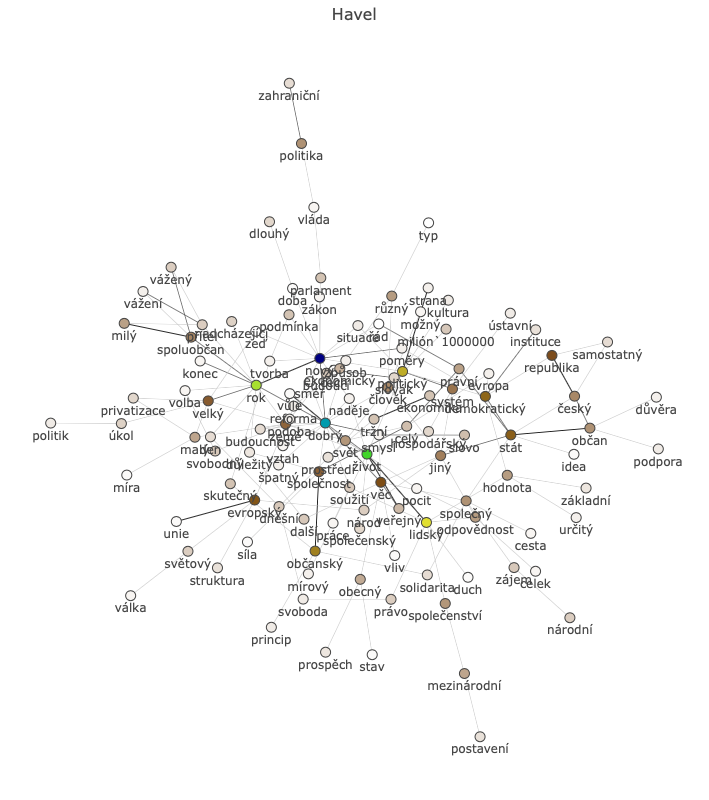

In [11]:
### based on our functions defined externally
### build a network from all speeches by Havel
network_havel = nf.network_formation_df(projevy_df, "Havel", 200, 3)
nf.draw_2d_network(network_havel, "Havel", "offline")

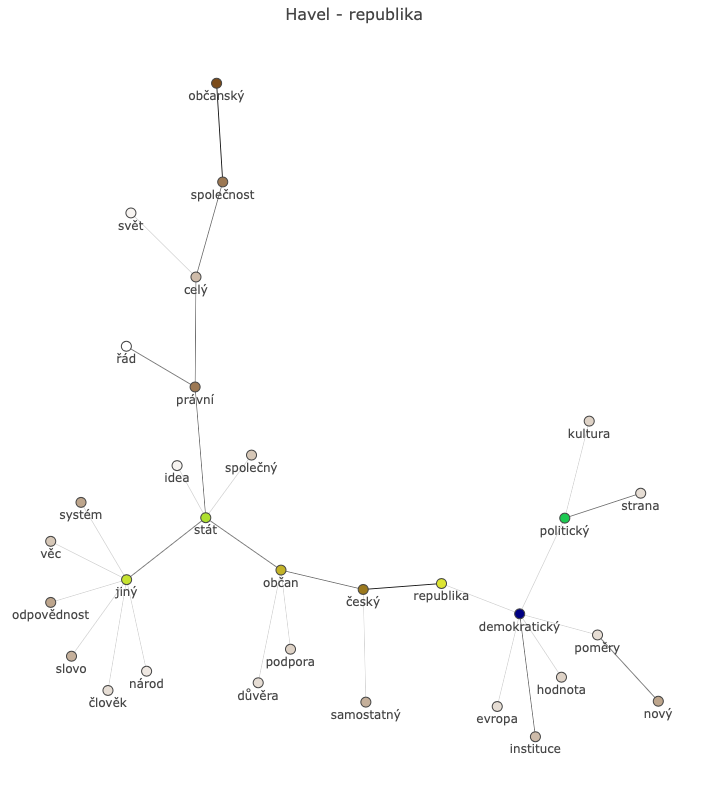

In [12]:
nf.ego_network_drawing_reduced(network_havel, "republika", 30, "Havel - republika", "offline")